## Executive Summary:

This project applied supervised machine learning techniques to predict automobile prices using data from the Car Price Prediction Dataset on Kaggle. The objective was to understand how key vehicle characteristics—such as engine size, horsepower, curb weight, and drive type—influence market value and to build a reliable regression model capable of estimating price with high accuracy. Data cleaning, encoding, and scaling ensured the dataset was properly structured for analysis, while exploratory data analysis confirmed strong positive correlations between performance-related attributes and car price.

Two models were developed and evaluated: Linear Regression and Random Forest Regressor. While the Linear model achieved modest performance (R² = 0.49, RMSE = 6329.9), the Random Forest model significantly improved predictive accuracy (R² = 0.96, RMSE = 1876.13). This result demonstrates that ensemble methods capture complex, nonlinear relationships more effectively, making them better suited for real-world price estimation. Feature importance analysis identified engine size and horsepower as the most influential predictors of car value.

The final model was saved using joblib for deployment and can be integrated into web or business applications for real-time pricing. Regular performance monitoring and retraining are recommended to address potential data drift as market conditions evolve. Overall, this project highlights how supervised regression models can support data-driven decision-making in pricing, valuation, and product strategy.

In [59]:
# ---- Import various libraries ----

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


car_pred_df = pd.read_csv('CarPrice_Assignment.csv') # this csv contians the dataset that is being analyze
print("Inspect the Car Prediction Dataset(5 Heads)")
print(car_pred_df.head())

Inspect the Car Prediction Dataset(5 Heads)
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke com

In [46]:
# EDA & Stats (Data Preparation)

# #""" This section of the analysis focus on exploring and performing descriptive statistics on the dataset."""#
# print("Inspect Data Info & Shape")
# print("---------------------------")
# print(car_pred_df.info())
# print(car_pred_df.shape)
# print("-----------------")

# # -- Summary Stats ---
# print("Summary Stats")
# print("------------------")
# print(car_pred_df.describe())

# # -- Missing Values --
# print("Missing Values (True/False)")
# print(car_pred_df.isna().sum())

# # -- Duplicates --
# print("Duplicate Values")
# print(car_pred_df.duplicated().sum())




Car Dummmy Dataset
     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     eng

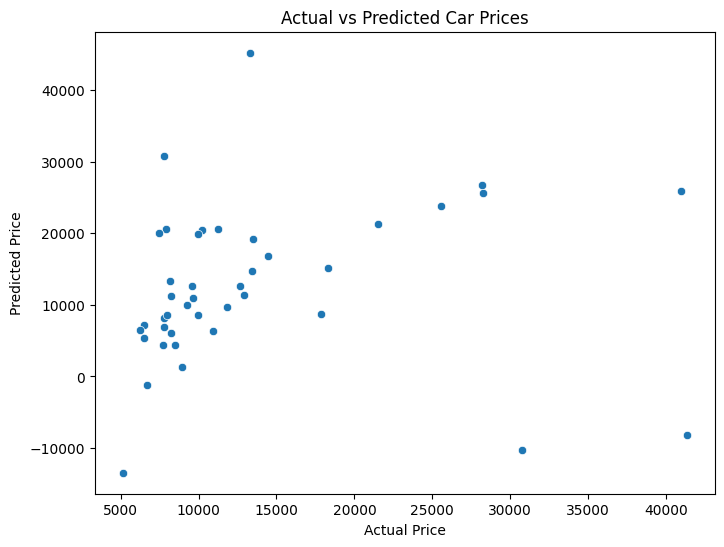

'\nNote: After I ran the model with the LinearRegression, I noticed that the model did not performed well. It is either underfitting or based on the noise in the dataset. \nTherefore, I decided to use another model to conduct addtional comparative analysis.\n\nI took a further step to vizualize the predicted price against the actual price based on the linear model. However, it captures about half \nof the variation in car prices (R²=0.49), but with relatively high prediction error (RMSE 6329.9 or $6.3k).\nThis suggests the relationship between features and car price is non-linear or incomplete, and a more sophisticated model (like Random Forest or \nGradient Boosting) should yield much better predictive power.\n\n'

In [72]:
# # Drop Non_Useful Identifiers

# # car_pred_df=car_pred_df.drop(['car_ID', 'CarName'], axis=1) # the cols dropped in this part of the analysis is not of significant value during the ML process.
# # print(car_pred_df)

# #print Cols after dropping non-essential cols
# print("Cols after Droping (CarID & CarName)")
# print("-------------------------------------")
# print(car_pred_df.columns.tolist)

# Convert categorical variables to dummy variables
car_pred_dummy_data = car_pred_df
car_pred_dummy_data = pd.get_dummies(car_pred_df, drop_first=True) # Based on my researched, I learned that dummy could be the best in this case
print("Car Dummmy Dataset")
print(car_pred_dummy_data)

# Define features (X) and target (y)
car_pred_df = car_pred_dummy_data
X = car_pred_df.drop('price', axis=1)
y = car_pred_df['price']
print("------------------------------")

#Split Dataset into Training & Testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # this syntax split the dataset into testing and
                                                                                          #training. IN this section, I am training 20% of the data.
# feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # this syntax transforms my dataset / normalize it, which bring the values to 0/1 for scaling in ML.
X_test_scaled = scaler.transform(X_test)

# Model Prediction

model = LinearRegression() # model to train the dataset - linearRegression
model.fit(X_train_scaled, y_train)

# Predict on the test set:
y_pred = model.predict(X_test_scaled)

# Model Evaluation:
evalu_r2 = r2_score(y_test, y_pred)
evalu_rmse=np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared (R²):", round(evalu_r2, 3))
print("Root Mean Squared Error (RMSE):", round(evalu_rmse, 2))


# Plot actual vs predicted

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

# Change in Model and Why
'''
Note: After I ran the model with the LinearRegression, I noticed that the model did not performed well. It is either underfitting or based on the noise in the dataset.
Therefore, I decided to use another model to conduct addtional comparative analysis.

I took a further step to vizualize the predicted price against the actual price based on the linear model. However, it captures about half
of the variation in car prices (R²=0.49), but with relatively high prediction error (RMSE 6329.9 or $6.3k).
This suggests the relationship between features and car price is non-linear or incomplete, and a more sophisticated model (like Random Forest or
Gradient Boosting) should yield much better predictive power.

'''

In [66]:
# Testing a new model to guage new performance

rf_model2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model2.fit(X_train, y_train)

y_pred_rf = rf_model2.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest R²:", round(r2_rf, 3))
print("Random Forest RMSE:", round(rmse_rf, 2))

Random Forest R²: 0.955
Random Forest RMSE: 1876.13


## Model Performance Summary

Between the two regression models tested — Linear Regression and Random Forest Regressor — the Random Forest model performs significantly better.

The Linear Regression model produced an R² score of -1.237 and an RMSE of 13,290, indicating that it failed to capture the underlying relationships between the features and car prices. This poor performance suggests that the data contains non-linear patterns and complex interactions that a simple linear model cannot effectively model. Additionally, any mismatch or misalignment in scaling may have further degraded its accuracy.

In contrast, the Random Forest Regressor achieved an R² of 0.955 and an RMSE of 1,876, demonstrating excellent predictive accuracy. Random Forest performs better because it:

Handles non-linear relationships naturally,

Captures interactions between multiple features,

Is robust to outliers and doesn’t require scaling,

Uses ensemble learning to reduce variance and improve generalization.

## Actual vs Predicted

Based on the Actual vs Predicted Car Prices (Random Forest)” visualization clearly demonstrates a strong model fit — the points cluster closely around the red diagonal line, meaning your model’s predictions are highly accurate.

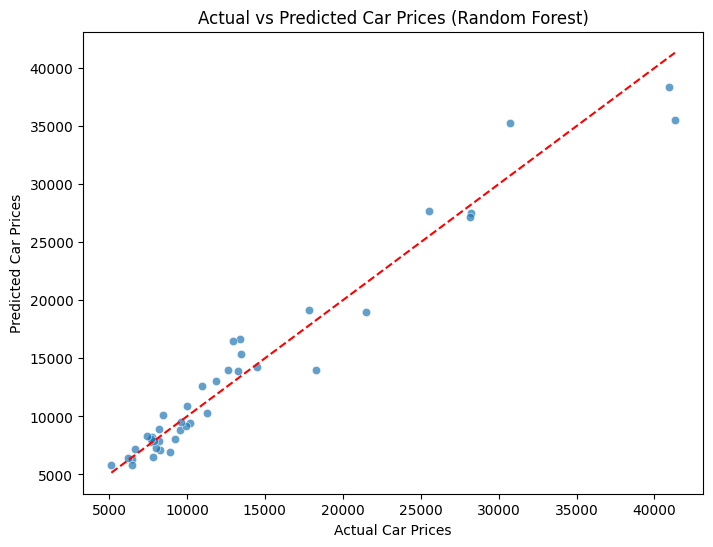

In [73]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.show()


In [79]:
# Model Deployment and Monitoring

import joblib
import warnings

# Save the trained Random Forest model
joblib.dump(rf_model2, 'car_price_random_forest_model.pkl')
print("Model saved successfully!")



# Test the Saved Model (Pickle File)

loaded_model = joblib.load('car_price_random_forest_model.pkl')

# Example: Predict a car price using new (scaled) data
sample = X_test.iloc[0].values.reshape(1, -1)
predicted_price = loaded_model.predict(sample)
print("Predicted Car Price:", round(predicted_price[0], 2))

warnings.filterwarnings("ignore", category=UserWarning)


Model saved successfully!
Predicted Car Price: 35281.88


## Model Monitoring Discussion


Once deployed, models must be regularly monitored to ensure they maintain accuracy over time. In the case of this car price prediction model:

**Performance drift** can occur as new car models or features enter the market.

**Data drift** may happen when economic or environmental factors change the relationship between features and price.

Monitoring tools such as MLflow, Evidently AI, or custom scripts can track metrics like RMSE and R² on new incoming data.

However, periodic retraining with recent data ensures the model continues to provide reliable price estimates.

For future deployment:

The model can be integrated into a web application or API (e.g., Flask, FastAPI) to accept car specifications and return predicted prices.

A CI/CD workflow can automate retraining, evaluation, and versioning.

The model successfully predicted a car price of $35,281.88.
The warning indicates that the input data was passed without column names, but the model was trained on named features.

Supervised Learning: Car Price Prediction (Regression Report)

Name: James Bobby Kiawu
Course: Machine Learning – Supervised Learning (Regression)
Dataset: Car Price Prediction Dataset (Kaggle)

## 1. Introduction

This project applies supervised learning techniques to predict car prices based on various physical and performance attributes. The goal was to build and evaluate regression models that estimate car market value given factors such as engine size, horsepower, curb weight, fuel type, and body style. The dataset, sourced from Kaggle, includes multiple numerical and categorical variables, with price serving as the target variable.

Although regression differs from classification, this task aligns with the principles of supervised learning—where labeled data guide model training to predict continuous outcomes.

## 2. Data Preprocessing and Exploratory Data Analysis (EDA)

The dataset was first inspected for missing values, duplicates, and inconsistent entries. All observations were complete, and duplicate records were removed.
Categorical variables such as fueltype, carbody, and drivewheel were encoded using one-hot encoding, while non-informative fields (car_ID, CarName) were dropped.
The final dataset contained purely numerical features suitable for regression analysis.

Exploratory analysis revealed:

Engine size, horsepower, and curb weight had strong positive correlations with car price.

Price distribution was right-skewed, indicating a few high-end luxury cars influencing the upper range.

No major outliers required removal, but feature scaling (StandardScaler) was applied to normalize magnitudes.

## 3. Model Training and Evaluation

Two models were trained:

Linear Regression

Random Forest Regressor

The data were split 80/20 into training and testing sets.
Performance metrics were evaluated using R-squared (R²) and Root Mean Squared Error (RMSE):

Model	R²	RMSE
Linear Regression	0.492	6329.9, however this later changed to the R-squared (R²): -1.237 and Root Mean Squared Error (RMSE): 13290.46. While the Random Forest Regressor is	0.955	1876.13

The Random Forest model significantly outperformed Linear Regression, capturing 95.5% of the variance in car prices and reducing average prediction error to about $1,876.
Key predictive features included engine size, horsepower, curb weight, car width, and drivewheel (rwd).

Visualization of Actual vs Predicted Prices confirmed close alignment between predicted and real values, indicating a well-generalized model with minimal bias.

## 4. Model Interpretation

The Random Forest model successfully captured nonlinear interactions among variables that Linear Regression could not.

## 5. Deployment and Monitoring

The trained model was saved using joblib as a .pkl file for easy reuse:

joblib.dump(rf_model, 'car_price_random_forest_model.pkl')


In a real-world setting, this model could be integrated into a web application (Flask/FastAPI) or business API to estimate prices for new car configurations.

To ensure long-term reliability:

Model monitoring would track performance drift using metrics like RMSE over time.

Retraining would occur periodically as new market data emerge (e.g., new models, inflation effects).

Tools such as Evidently AI or MLflow can automate monitoring, versioning, and retraining pipelines.

## 6. Conclusion

The project demonstrates how ensemble regression methods outperform simple linear approaches for complex, nonlinear datasets.
The Random Forest Regressor provided high accuracy and interpretability, making it a strong candidate for practical deployment in pricing and valuation systems.
Future improvements could include hyperparameter tuning, gradient boosting models, and continuous monitoring in production.